# Vacuum Gauge Classifier
Advanced tool for classifying vacuum gauges 

* [Setup](#setup)
    * [Environment](#env)
    * [Data Retrieval (illustrative)](#retrieval)
    * [Data Normalization (illustrative)](#norm)
    * [Data Interpolation (illustrative)](#interpolate)
    * [Data Masking (illustrative)](#masking)
* [Dataset Creation](#create)
    * [Bin Data (illustrative)](#level)
    * [Generate Dataset](#gen)
    * [Select Dataset](#select)
* [K-Neighbours Classifiaton](#kneighbours)
    * [Split Dataset](#split)
    * [Parameter Optimization (illustrative)](#crossvalidate)
    * [Manual Optimization (illustrative)](#manuel)
    * [Final Evaluation](#eva)
* [Use Model](#use)
    * [Save Model](#save)
    * [Load Model](#load)

# <a id='setup'> Setup </a>
## <a id='env'>Environment </a>

In [2]:

%run BackEnd_Plotters.ipynb
%run BackEnd_DataProcessing.ipynb
%run BackEnd_Classifiers.ipynb


Populating the interactive namespace from numpy and matplotlib


## <a id='retrieval'> Retrieve Data </a>

<IPython.core.display.Javascript object>


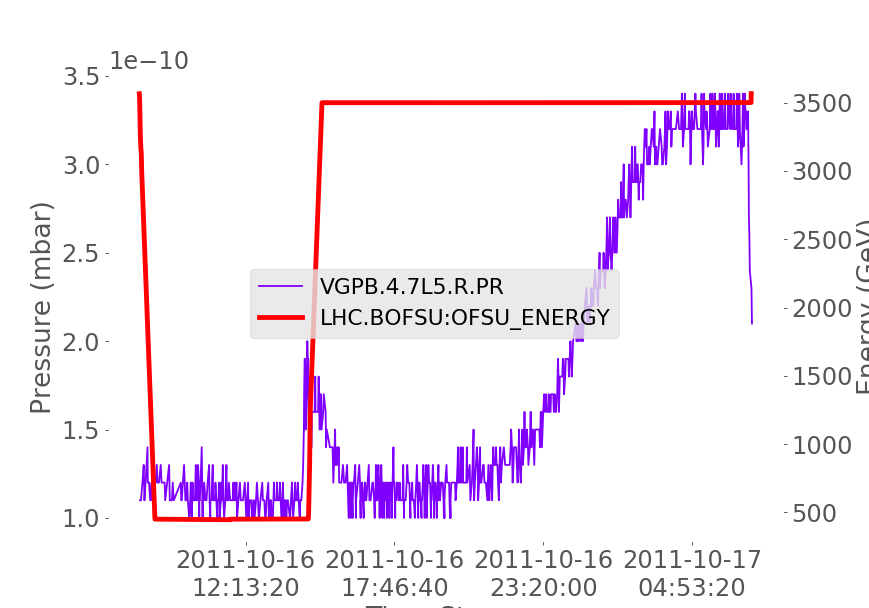

In [4]:
gauge_id = "VGPB.4.7L5.R.PR"
fillNo = 2219

pressure_readings,\
time_readings,\
beam_time,\
beam_energy = retrieve_gauge_data(gauge_id, fillNo,show_plot=True)


## <a id='norm'> Data Normalization </a>

<IPython.core.display.Javascript object>


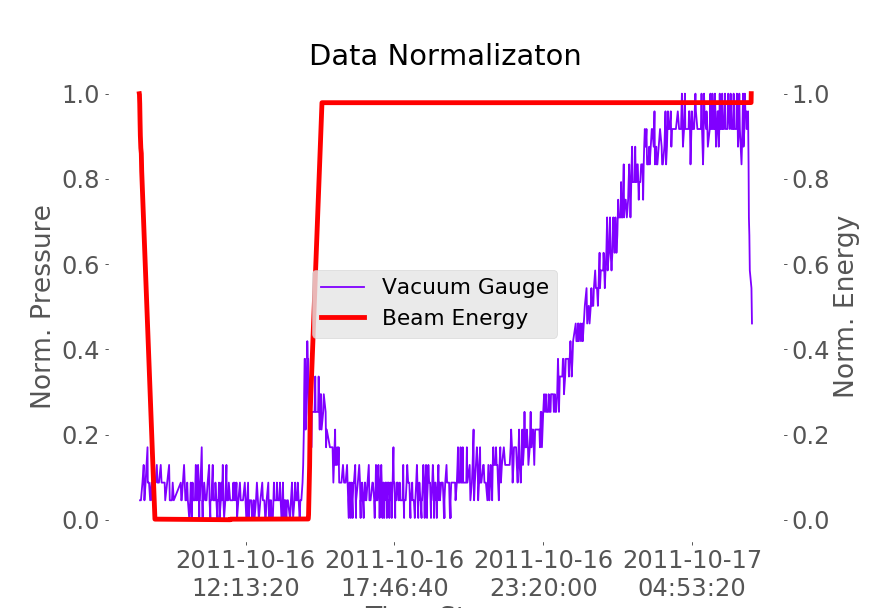

In [5]:
pressure_readings,\
beam_energy = normalize_y(time_readings,
                          beam_time,
                          pressure_readings,
                          beam_energy,
                          show_plot=True)

## <a id=interpolate> Data Interpolation </a>

<IPython.core.display.Javascript object>


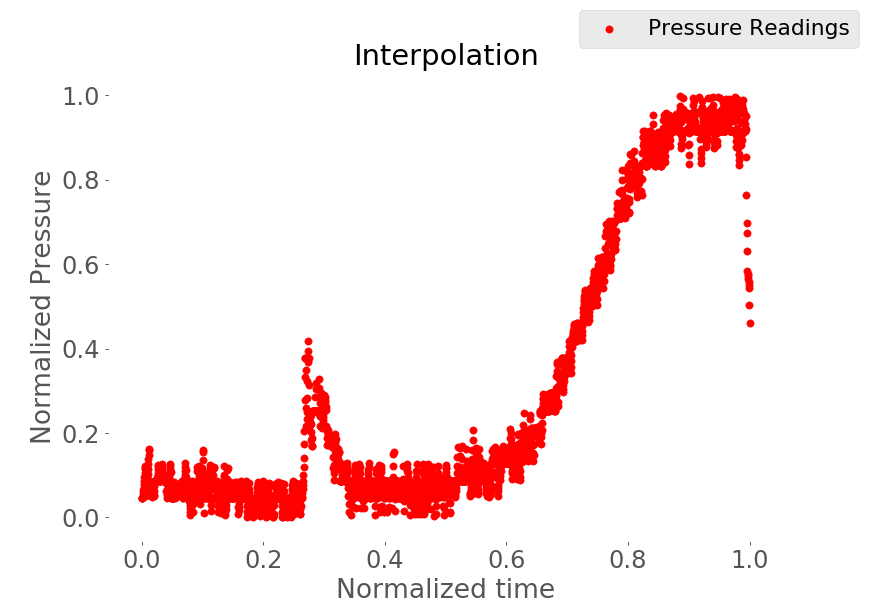

In [6]:
time_readings,\
pressure_readings,\
beam_time,\
beam_energy = interpolate_readings(pressure_readings, time_readings, beam_time, beam_energy,
                                   show_plot=True)


## <a id='masking'> Data Masking </a>

<IPython.core.display.Javascript object>


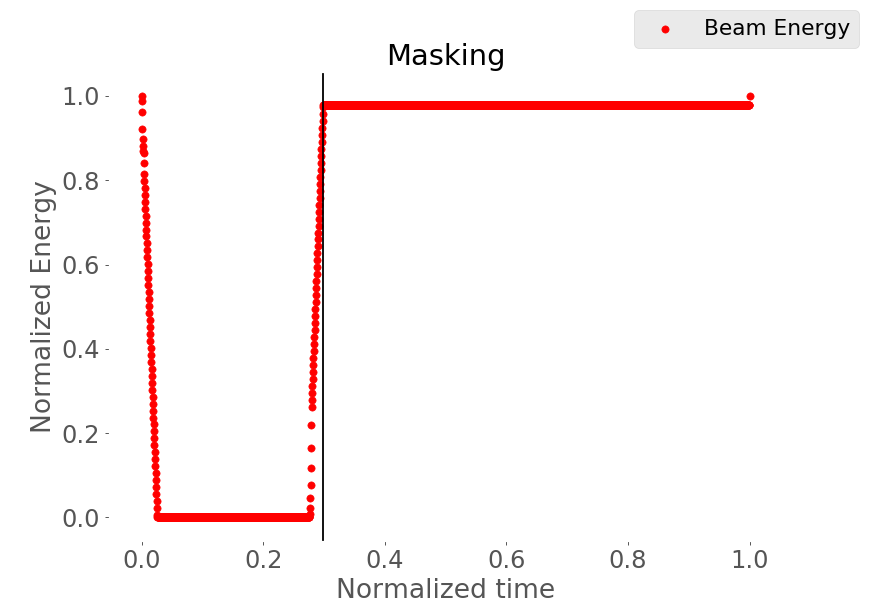

Could not find appropriate cut-off


In [7]:
mask,\
threshold = double_threshold_energy_masking(time_readings, 
                             beam_time,
                             beam_energy,
                            show_plot=True)

# <a id='create'> Dataset Creation </a>
## <a id='level'> Bin the Data </a>
Split data into segments and return their averages. <br>
These are used as the **feautures** for the Algorithm

<IPython.core.display.Javascript object>


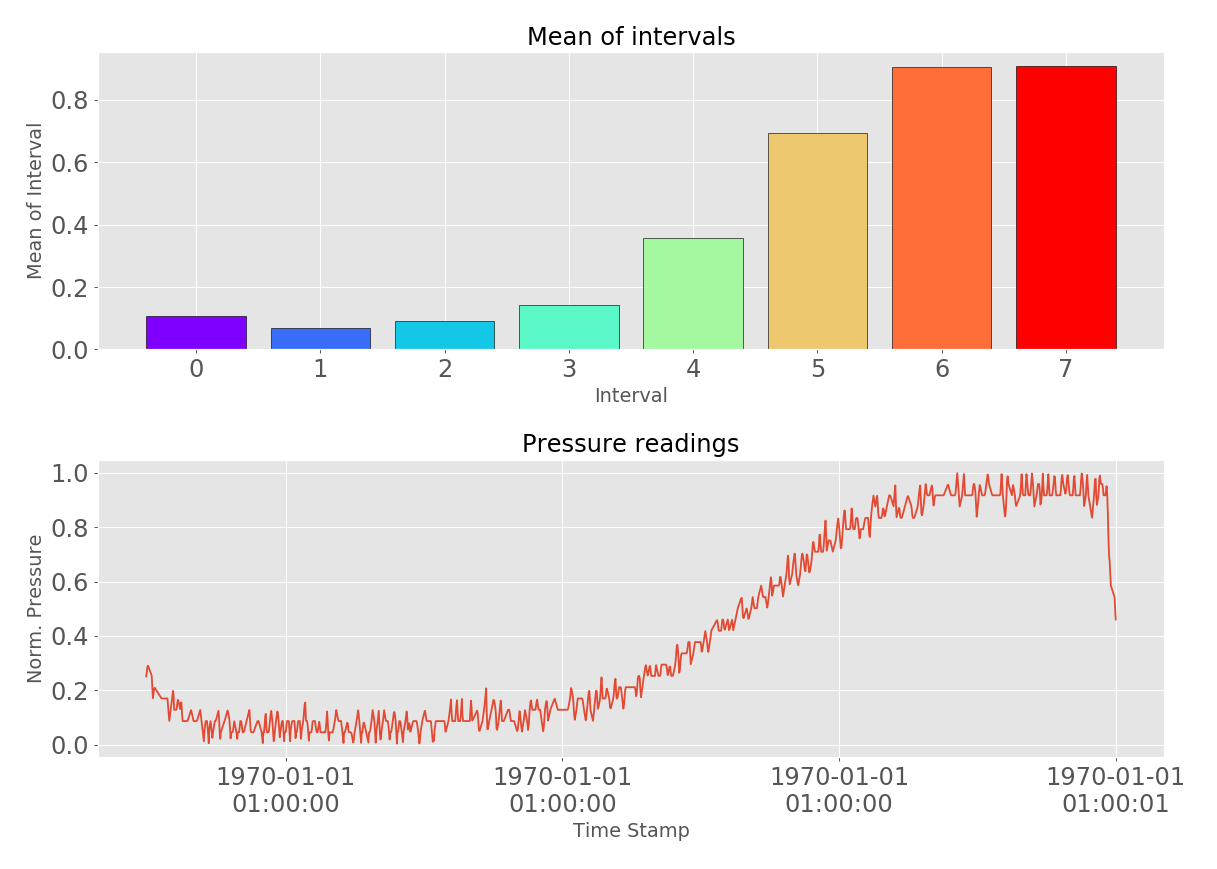

(<Figure size 1400x1000 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa2267c9940>)

In [75]:
pressure_levels = bin_data(pressure_readings[mask],8)
plot_levelled_data(gauge_id, pressure_levels, time_readings[mask],pressure_readings[mask])

## <a id='gen'> Generate Datasets </a>
Use CSV file catalogue containing probe/gauge information and their ground truth to generate a SciKit Learn dataset ('bunch').


In [16]:

balanced_datasets = get_or_create_datasets("Balanced", feature_spec=(1,13), reset=0, verbose=1)


Catalogue Balanced: (495, 6)


In [17]:
for key in balanced_datasets.keys(): 
    print("{0}Balanced Dataset with {2} Features:{1}".format(color.BOLD,color.END,key))
    display(balanced_datasets[key].head())

Balanced Dataset with 1 Features:


,Bin0,Response,Probe ID,Fill
0,0.196357,1,VGPE.484.15R5.M.PR,2216
1,0.885396,0,VGPB.864.7R4.R.PR,2216
2,0.717063,1,VGPB.86.7R2.R.PR,2216
3,0.724267,0,VGPB.85.7L2.B.PR,2216
4,0.764229,1,VGPB.812.5R4.R.PR,2216


Balanced Dataset with 2 Features:


,Bin0,Bin1,Response,Probe ID,Fill
0,0.096393,0.296321,1,VGPE.484.15R5.M.PR,2216
1,0.974762,0.795966,0,VGPB.864.7R4.R.PR,2216
2,0.645606,0.788521,1,VGPB.86.7R2.R.PR,2216
3,0.829298,0.619235,0,VGPB.85.7L2.B.PR,2216
4,0.730838,0.797621,1,VGPB.812.5R4.R.PR,2216


Balanced Dataset with 3 Features:


,Bin0,Bin1,Bin2,Response,Probe ID,Fill
0,0.080373,0.165112,0.343585,1,VGPE.484.15R5.M.PR,2216
1,0.981882,0.941322,0.732880,0,VGPB.864.7R4.R.PR,2216
2,0.636089,0.711765,0.803337,1,VGPB.86.7R2.R.PR,2216
3,0.849849,0.758701,0.564250,0,VGPB.85.7L2.B.PR,2216
4,0.707927,0.824981,0.759780,1,VGPB.812.5R4.R.PR,2216


Balanced Dataset with 4 Features:


,Bin0,Bin1,Bin2,Bin3,Response,Probe ID,Fill
0,0.078214,0.114703,0.224900,0.368059,1,VGPE.484.15R5.M.PR,2216
1,0.982367,0.967145,0.907218,0.684714,0,VGPB.864.7R4.R.PR,2216
2,0.634954,0.656258,0.796221,0.780820,1,VGPB.86.7R2.R.PR,2216
3,0.858675,0.799826,0.710508,0.527913,0,VGPB.85.7L2.B.PR,2216
4,0.710041,0.751634,0.873448,0.721794,1,VGPB.812.5R4.R.PR,2216


Balanced Dataset with 5 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Response,Probe ID,Fill
0,0.079498,0.093463,0.161765,0.264503,0.383173,1,VGPE.484.15R5.M.PR,2216
1,0.984164,0.976290,0.943032,0.879287,0.643761,0,VGPB.864.7R4.R.PR,2216
2,0.638759,0.645989,0.706988,0.837164,0.756817,1,VGPB.86.7R2.R.PR,2216
3,0.863664,0.821520,0.758964,0.678504,0.498681,0,VGPB.85.7L2.B.PR,2216
4,0.726932,0.704138,0.825634,0.897543,0.667516,1,VGPB.812.5R4.R.PR,2216


Balanced Dataset with 6 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Response,Probe ID,Fill
0,0.079859,0.080887,0.128433,0.201792,0.295455,0.391716,1,VGPE.484.15R5.M.PR,2216
1,0.986127,0.977628,0.960505,0.922138,0.859305,0.606455,0,VGPB.864.7R4.R.PR,2216
2,0.650475,0.621703,0.664640,0.758889,0.894800,0.711874,1,VGPB.86.7R2.R.PR,2216
3,0.866661,0.833037,0.788195,0.729207,0.657807,0.470692,0,VGPB.85.7L2.B.PR,2216
4,0.743016,0.672837,0.776660,0.873302,0.889285,0.630276,1,VGPB.812.5R4.R.PR,2216


Balanced Dataset with 7 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Response,Probe ID,Fill
0,0.082140,0.076065,0.108033,0.162143,0.231753,0.318746,0.397023,1,VGPE.484.15R5.M.PR,2216
1,0.986949,0.977190,0.971135,0.944487,0.902961,0.844884,0.569909,0,VGPB.864.7R4.R.PR,2216
2,0.654347,0.606366,0.665795,0.715057,0.794927,0.915902,0.667890,1,VGPB.86.7R2.R.PR,2216
3,0.869352,0.840501,0.807534,0.758518,0.704591,0.644772,0.444169,0,VGPB.85.7L2.B.PR,2216
4,0.752992,0.657593,0.743818,0.828198,0.881750,0.876483,0.608871,1,VGPB.812.5R4.R.PR,2216


Balanced Dataset with 8 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Response,Probe ID,Fill
0,0.083425,0.073004,0.098029,0.131377,0.192181,0.258045,0.336189,0.400146,1,VGPE.484.15R5.M.PR,2216
1,0.987677,0.977057,0.978025,0.956214,0.929948,0.884152,0.834837,0.534096,0,VGPB.864.7R4.R.PR,2216
2,0.657053,0.612855,0.651835,0.660682,0.750763,0.841679,0.912382,0.649259,1,VGPB.86.7R2.R.PR,2216
3,0.871036,0.846120,0.820333,0.779433,0.736886,0.684130,0.637067,0.418759,0,VGPB.85.7L2.B.PR,2216
4,0.760573,0.659510,0.720661,0.782607,0.858930,0.887966,0.850847,0.592742,1,VGPB.812.5R4.R.PR,2216


Balanced Dataset with 9 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Bin8,Response,Probe ID,Fill
0,0.084623,0.071511,0.084984,0.119071,0.162383,0.213882,0.278137,0.348151,0.404469,1,VGPE.484.15R5.M.PR,2216
1,0.988077,0.978292,0.979257,0.964795,0.944718,0.914452,0.870813,0.826735,0.501091,0,VGPB.864.7R4.R.PR,2216
2,0.662239,0.607691,0.638336,0.657236,0.727218,0.750839,0.866864,0.914246,0.628900,1,VGPB.86.7R2.R.PR,2216
3,0.872150,0.851443,0.825954,0.797848,0.758559,0.719697,0.667683,0.631717,0.393349,0,VGPB.85.7L2.B.PR,2216
4,0.765496,0.671455,0.686828,0.756353,0.825656,0.892935,0.886785,0.819391,0.573165,1,VGPB.812.5R4.R.PR,2216


Balanced Dataset with 10 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Bin8,Bin9,Response,Probe ID,Fill
0,0.085711,0.073190,0.078617,0.108483,0.136483,0.187046,0.232598,0.296408,0.359166,0.407180,1,VGPE.484.15R5.M.PR,2216
1,0.987645,0.980612,0.978149,0.974380,0.952849,0.933179,0.899070,0.859504,0.819686,0.467836,0,VGPB.864.7R4.R.PR,2216
2,0.658222,0.619621,0.614717,0.676971,0.659395,0.754581,0.798036,0.876292,0.908715,0.604918,1,VGPB.86.7R2.R.PR,2216
3,0.873228,0.854100,0.834175,0.808866,0.776121,0.741807,0.702360,0.654649,0.630036,0.367325,0,VGPB.85.7L2.B.PR,2216
4,0.768596,0.684051,0.663182,0.746037,0.793042,0.858226,0.886885,0.908201,0.779600,0.555431,1,VGPB.812.5R4.R.PR,2216


Balanced Dataset with 11 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Bin8,Bin9,Bin10,Response,Probe ID,Fill
0,0.086362,0.075043,0.076159,0.089148,0.126573,0.164778,0.203246,0.254167,0.307327,0.367653,0.409468,1,VGPE.484.15R5.M.PR,2216
1,0.988066,0.982652,0.975850,0.977896,0.960774,0.946314,0.922199,0.885957,0.849720,0.814982,0.434537,0,VGPB.864.7R4.R.PR,2216
2,0.657961,0.632611,0.607021,0.658432,0.645940,0.738010,0.735503,0.845336,0.899633,0.884847,0.583248,1,VGPB.86.7R2.R.PR,2216
3,0.874083,0.856435,0.837013,0.820973,0.788284,0.759148,0.727373,0.687377,0.646421,0.625397,0.343529,0,VGPB.85.7L2.B.PR,2216
4,0.771139,0.700859,0.647232,0.730594,0.758908,0.822153,0.881134,0.881636,0.920398,0.750727,0.541743,1,VGPB.812.5R4.R.PR,2216


Balanced Dataset with 12 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Bin8,Bin9,Bin10,Bin11,Response,Probe ID,Fill
0,0.085830,0.074616,0.074121,0.087163,0.116975,0.140847,0.183220,0.221623,0.271427,0.320960,0.371005,0.412538,1,VGPE.484.15R5.M.PR,2216
1,0.987916,0.984331,0.974831,0.980425,0.968650,0.952360,0.935036,0.909240,0.877377,0.841232,0.811622,0.401287,0,VGPB.864.7R4.R.PR,2216
2,0.657564,0.643385,0.603912,0.639495,0.671192,0.658088,0.759109,0.758669,0.870885,0.918714,0.859579,0.564168,1,VGPB.86.7R2.R.PR,2216
3,0.875307,0.858034,0.842393,0.823478,0.803089,0.772905,0.743463,0.714755,0.673043,0.642292,0.620179,0.320969,0,VGPB.85.7L2.B.PR,2216
4,0.772558,0.713474,0.644091,0.701583,0.757059,0.796260,0.855014,0.891590,0.873739,0.904831,0.730444,0.530109,1,VGPB.812.5R4.R.PR,2216


In [18]:

representative_datasets = get_or_create_datasets("Representative", feature_spec=(1,13), reset=0, verbose=1)


Catalogue Representative: (1248, 6)


In [19]:
for key in representative_datasets.keys(): 
    print("{0}Representative Dataset with {2} Features:{1}".format(color.BOLD,color.END,key))
    display(representative_datasets[key].head())

Representative Dataset with 1 Features:


,Bin0,Response,Probe ID,Fill
0,0.271496,1,VGPB.220.1L1.X.PR,5979
1,0.046861,0,VGPB.222.1L1.X.PR,5979
2,0.805302,0,VGPB.190.1L2.X.PR,5979
3,0.636760,0,VGPB.220.1L2.X.PR,5979
4,0.623424,1,VGPB.222.1L2.X.PR,5979


Representative Dataset with 2 Features:


,Bin0,Bin1,Response,Probe ID,Fill
0,0.305281,0.237679,1,VGPB.220.1L1.X.PR,5979
1,0.052844,0.040873,0,VGPB.222.1L1.X.PR,5979
2,0.900116,0.710375,0,VGPB.190.1L2.X.PR,5979
3,0.748438,0.525053,0,VGPB.220.1L2.X.PR,5979
4,0.732848,0.514000,1,VGPB.222.1L2.X.PR,5979


Representative Dataset with 3 Features:


,Bin0,Bin1,Bin2,Response,Probe ID,Fill
0,0.381885,0.190815,0.241746,1,VGPB.220.1L1.X.PR,5979
1,0.054872,0.047050,0.038660,0,VGPB.222.1L1.X.PR,5979
2,0.927411,0.813856,0.674640,0,VGPB.190.1L2.X.PR,5979
3,0.793665,0.614246,0.502310,0,VGPB.220.1L2.X.PR,5979
4,0.780834,0.589961,0.499040,1,VGPB.222.1L2.X.PR,5979


Representative Dataset with 4 Features:


,Bin0,Bin1,Bin2,Bin3,Response,Probe ID,Fill
0,0.419812,0.190751,0.233995,0.241369,1,VGPB.220.1L1.X.PR,5979
1,0.055150,0.050539,0.044476,0.037265,0,VGPB.222.1L1.X.PR,5979
2,0.937469,0.862674,0.766351,0.654398,0,VGPB.190.1L2.X.PR,5979
3,0.814200,0.682644,0.557005,0.493102,0,VGPB.220.1L2.X.PR,5979
4,0.801912,0.663048,0.541328,0.486384,1,VGPB.222.1L2.X.PR,5979


Representative Dataset with 5 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Response,Probe ID,Fill
0,0.476872,0.207201,0.186942,0.249699,0.236633,1,VGPB.220.1L1.X.PR,5979
1,0.055389,0.052958,0.046410,0.043125,0.036407,0,VGPB.222.1L1.X.PR,5979
2,0.941608,0.893286,0.811696,0.740212,0.639710,0,VGPB.190.1L2.X.PR,5979
3,0.826102,0.724281,0.615371,0.536251,0.481621,0,VGPB.220.1L2.X.PR,5979
4,0.819383,0.704816,0.587636,0.529997,0.474416,1,VGPB.222.1L2.X.PR,5979


Representative Dataset with 6 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Response,Probe ID,Fill
0,0.477800,0.285970,0.152075,0.229555,0.248563,0.234910,1,VGPB.220.1L1.X.PR,5979
1,0.054913,0.054831,0.048776,0.045296,0.041549,0.035761,0,VGPB.222.1L1.X.PR,5979
2,0.941796,0.912841,0.845371,0.781776,0.723323,0.625682,0,VGPB.190.1L2.X.PR,5979
3,0.835261,0.752037,0.657951,0.570540,0.531587,0.473034,0,VGPB.220.1L2.X.PR,5979
4,0.830689,0.730247,0.635828,0.543488,0.537050,0.461029,1,VGPB.222.1L2.X.PR,5979


Representative Dataset with 7 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Response,Probe ID,Fill
0,0.476571,0.305876,0.209640,0.179914,0.245435,0.249072,0.233173,1,VGPB.220.1L1.X.PR,5979
1,0.054270,0.055844,0.051775,0.045873,0.044552,0.040426,0.035241,0,VGPB.222.1L1.X.PR,5979
2,0.936530,0.931601,0.870784,0.811069,0.759913,0.711912,0.614506,0,VGPB.190.1L2.X.PR,5979
3,0.842047,0.768815,0.691609,0.613794,0.546023,0.527075,0.467711,0,VGPB.220.1L2.X.PR,5979
4,0.836676,0.753816,0.673354,0.586770,0.524118,0.538979,0.450254,1,VGPB.222.1L2.X.PR,5979


Representative Dataset with 8 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Response,Probe ID,Fill
0,0.474831,0.363916,0.226613,0.154837,0.223230,0.244856,0.250875,0.231863,1,VGPB.220.1L1.X.PR,5979
1,0.053718,0.056573,0.053325,0.047730,0.045321,0.043624,0.040142,0.034388,0,VGPB.222.1L1.X.PR,5979
2,0.934110,0.940843,0.886609,0.838739,0.786533,0.746169,0.704094,0.604703,0,VGPB.190.1L2.X.PR,5979
3,0.846684,0.781715,0.717398,0.647845,0.581582,0.532317,0.522929,0.463216,0,VGPB.220.1L2.X.PR,5979
4,0.842293,0.761531,0.698107,0.627989,0.551101,0.531397,0.527664,0.444745,1,VGPB.222.1L2.X.PR,5979


Representative Dataset with 9 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Bin8,Response,Probe ID,Fill
0,0.475369,0.421587,0.248699,0.150653,0.178856,0.242936,0.246967,0.248018,0.230205,1,VGPB.220.1L1.X.PR,5979
1,0.053190,0.057539,0.053887,0.050463,0.045439,0.045200,0.042364,0.039983,0.033605,0,VGPB.222.1L1.X.PR,5979
2,0.930717,0.949715,0.901801,0.858928,0.811420,0.771221,0.730009,0.698506,0.595405,0,VGPB.190.1L2.X.PR,5979
3,0.849024,0.792609,0.739299,0.671302,0.615345,0.556089,0.532636,0.514885,0.459410,0,VGPB.220.1L2.X.PR,5979
4,0.847904,0.775447,0.719152,0.656513,0.586691,0.526680,0.536237,0.519097,0.441176,1,VGPB.222.1L2.X.PR,5979


Representative Dataset with 10 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Bin8,Bin9,Response,Probe ID,Fill
0,0.479676,0.472704,0.192782,0.221500,0.158207,0.215867,0.249996,0.249402,0.245240,0.228025,1,VGPB.220.1L1.X.PR,5979
1,0.052530,0.058258,0.054109,0.051808,0.047517,0.045302,0.044879,0.041371,0.039819,0.032994,0,VGPB.222.1L1.X.PR,5979
2,0.926994,0.956169,0.913186,0.872871,0.830224,0.791837,0.758964,0.720962,0.692693,0.586275,0,VGPB.190.1L2.X.PR,5979
3,0.850428,0.801776,0.752920,0.695643,0.641285,0.589401,0.539062,0.533397,0.507734,0.455434,0,VGPB.220.1L2.X.PR,5979
4,0.852207,0.785749,0.733461,0.674910,0.612844,0.559668,0.519956,0.540111,0.509877,0.438955,1,VGPB.222.1L2.X.PR,5979


Representative Dataset with 11 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Bin8,Bin9,Bin10,Response,Probe ID,Fill
0,0.483184,0.472596,0.246943,0.246058,0.152127,0.177046,0.238735,0.245622,0.252362,0.245590,0.226193,1,VGPB.220.1L1.X.PR,5979
1,0.051742,0.058836,0.054597,0.053539,0.049286,0.045134,0.045464,0.043856,0.040766,0.039571,0.032550,0,VGPB.222.1L1.X.PR,5979
2,0.922832,0.961265,0.921144,0.883865,0.851930,0.811282,0.772384,0.750359,0.716736,0.685642,0.577789,0,VGPB.190.1L2.X.PR,5979
3,0.850861,0.810918,0.764415,0.715601,0.660008,0.615554,0.565529,0.533136,0.534524,0.501369,0.451622,0,VGPB.220.1L2.X.PR,5979
4,0.856125,0.794773,0.741984,0.690121,0.648136,0.586128,0.529861,0.530135,0.538028,0.498665,0.437432,1,VGPB.222.1L2.X.PR,5979


Representative Dataset with 12 Features:


,Bin0,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Bin8,Bin9,Bin10,Bin11,Response,Probe ID,Fill
0,0.483962,0.471637,0.303837,0.268103,0.148641,0.155509,0.211575,0.247534,0.242876,0.254251,0.245441,0.224319,1,VGPB.220.1L1.X.PR,5979
1,0.050982,0.058856,0.055589,0.054059,0.050567,0.046960,0.045551,0.045042,0.042825,0.040274,0.039305,0.032217,0,VGPB.222.1L1.X.PR,5979
2,0.918187,0.965405,0.928814,0.896867,0.865114,0.825629,0.795926,0.767403,0.734766,0.711399,0.681641,0.569214,0,VGPB.190.1L2.X.PR,5979
3,0.851939,0.818558,0.772045,0.732029,0.679575,0.636327,0.592464,0.548616,0.529936,0.533237,0.497625,0.448443,0,VGPB.220.1L2.X.PR,5979
4,0.859141,0.801433,0.743129,0.716766,0.665935,0.605721,0.566295,0.520681,0.537009,0.537092,0.485400,0.436658,1,VGPB.222.1L2.X.PR,5979


## <a id="select"> Select Specific Dataset </a>
Used for illustrating how the algorithm is prepared step-by-step, for full optimization <br>
all loaded datasets can be used to vary the no. of features.

In [17]:
feature_options = representative_datasets.keys()
feature_field = widgets.BoundedIntText(
    value=4,
    min=min(feature_options),
    max=max(feature_options),
    step=1,
    description='No Of Features:',
)
display(feature_field)

BoundedIntText(value=4, description='No Of Features:', max=12, min=1)

<IPython.core.display.Javascript object>


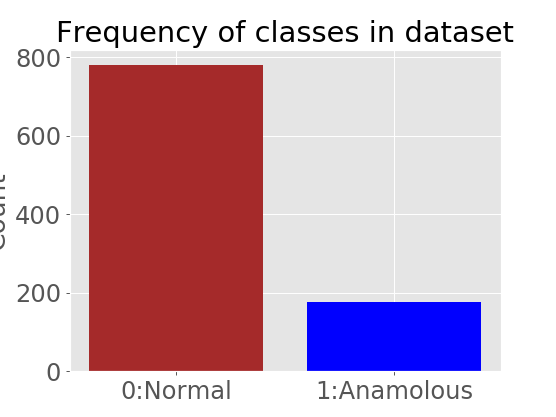

,Bin0,Bin1,Bin2,Bin3,Response,Probe ID,Fill
0,0.419812,0.190751,0.233995,0.241369,1,VGPB.220.1L1.X.PR,5979
1,0.055150,0.050539,0.044476,0.037265,0,VGPB.222.1L1.X.PR,5979
2,0.937469,0.862674,0.766351,0.654398,0,VGPB.190.1L2.X.PR,5979
3,0.814200,0.682644,0.557005,0.493102,0,VGPB.220.1L2.X.PR,5979
4,0.801912,0.663048,0.541328,0.486384,1,VGPB.222.1L2.X.PR,5979


In [18]:
dataset = representative_datasets[feature_field.value]

X,y,lookup = dataset.iloc[:,0:dataset.shape[1]-3],dataset.Response,dataset.iloc[:,-2:]

plt.figure()
plt.bar(x=['0:Normal','1:Anamolous'],height=[y.value_counts()[0],y.value_counts()[1]],color=['brown','blue'])
plt.ylabel("Count")
plt.title("Frequency of classes in dataset")
plt.show()

display(dataset.head())

# <a id='kneighbours'> K-Nearest-Neighbours Classification </a>

The K-Neighbours classifier stores the parameters and classifications of all the samples given to it during training.

To predict the class of an unseen sample, it will the compare it to K of it's nearest neighbours. These are ones with similar
values for their features in the HyperSpace.

If the majority of the neighbours belong to one class then the new sample belongs to that class. These 'votes' can additionally <br>
be weighted by distance. Since odd numbers prevent a stalemate, these are generally better, however distance is used as a secondary <br>
metric if there equal numbers of neighbours in each class.


<img src=https://i.imgur.com/pDAQLpu.png alt='Illustration of K-Neighbours' align='left' width=800></img>

## <a id='split'> Setup Training and Testing sets </a>
Split the data into a test and training set using a random seed. 

In [22]:
X_train, X_test, X_train_labels, X_test_labels = split_dataset(X,y, seed = 0)

>>>> Splitting Dataset <<<<
Train set: Data (765, 4) Labels (765,)
    Test set:  Data (192, 4) Labels (192,)


# <a id='crossvalidate'> Grid Search Cross-Validation </a>
Test our model over a range of different k-values to find the best parameter. <br>

We implement GridSearch once manually, to reveal what it does, and then use the in-built function provided by SkLearn. <br>

This section corresponds to the left branch of this flowchart, as we are trying to find the best paramaters to build our model with. <br>

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" alt="Grid Search Workflow" width="400" align="left"> </img>

## Manual Grid-Search Walkthrough

### Cross-Validation
If we simply split our dataset once and train our model this way, it is possible that the model will be biased by how we happen to split 
up the original data.

To deal with this potential bias in performance, we employ cross-validation.

Here we split the dataset differently over multiple iterations to improve generalization. <br>

For each split with the cross-validator, we put aside 20% of the training data for validation and 80% for traning. <br>
<b>Background Reading: </b><a href="https://scikit-learn.org/stable/modules/cross_validation.html">SciKit Learn Documentation: Cross Validation<a> <br>
    

Here we have chosen to use Stratified K fold splitter, which preserves the original distribution of the dataset (about 50% of each class) in both the training_set and testing_set.<br>
By convention, we run 10 passes to ensure a fair scoring. <br>
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0071.png" alt="Stratified KFold" width="600" align="left"></img>

In [76]:
cv_splitter,\
average_cv_score = cross_validate_sets(X_train,
                                       X_train_labels,
                                       cv_splitter = None,
                                       classifier=sklearn.neighbors.KNeighborsClassifier,
                                       verbose=False)


>>>> Pick a CV-Splitter <<<<
(0, 'GroupKFold')
(1, 'GroupShuffleSplit')
(2, 'KFold')
(3, 'LeaveOneGroupOut')
(4, 'LeaveOneOut')

(6, 'LeavePOut')
(7, 'PredefinedSplit')
(8, 'RepeatedKFold')
(9, 'RepeatedStratifiedKFold')
(10, 'ShuffleSplit')

(12, 'StratifiedShuffleSplit')
(13, 'TimeSeriesSplit')

Type the Index of the CV-Splitter>>>12
Selected StratifiedShuffleSplit as CV-Splitter
model_selection.StratifiedShuffleSplit
>>>> Cross Validation <<<<
    Average CV score: 0.8941176470588236
    Train Set: 765.6
    Validation set: 191.4


##  <a id="manual">Find Best Parameter Manually</a>
If cross-validation is used to reduce bias from splitting, it is possible to objectively <br>
find the best parameter for maximizing a certain score (e.g. accuracy or the f1-score)

Here this is used to vary a single parameter and find it's optimum value, in the Grid Search <br>
in the section this is generalized to any number of parameters. 

Note that the seed only fixes the CV_splitter, results may still vary depening on which seed <br>
was used to split the dataset earlier.

In [ ]:
best_score, best_param_setting = find_best_parameter_manualy(X_train, X_train_labels,
                                                         scorer =metrics.accuracy_score, cv_splitter=sklearn.model_selection.StratifiedShuffleSplit,
                                                         classifier = sklearn.neighbors.KNeighborsClassifier, seed = 0, verbose=1, show_plot=True)

print("{}Best Score{}: {} for parameter set to {}".format(color.BOLD,color.END,best_score, best_param_setting))

## <a id="optimal">Optimal Parameters for K-Neighbour</a>
The k-value is not the only parameter we can vary to impact the performance of our model.

Instead we can change how we preprocess the data we give to our machine learning algorithm.

Before we levelled the data by calculating the avergage of X intervals. 

Changing the number of intervals could affect how well our model can discriminate between expected and unexpected behaviour, <br> 
since too many may confuse it by giving it meaningless patterns and too few may not give it enough useful information.

To implement this we iterate over different datasets with different number of bins.<br>
For each dataset we use Grid-Search Cross-validation as before to get the best parameters for that dataset.

**WARNING** If results between manual and grid search do NOT match, this is likely due to the seed value being different

In [20]:
best_no_of_features, best_params, best_score = find_best_parameters(balanced_datasets,
                                                                    param_grid = None,
                                                                    classifier = sklearn.neighbors.KNeighborsClassifier,
                                                                    cv_splitter = sklearn.model_selection.StratifiedShuffleSplit,
                                                                    scorer=metrics.accuracy_score,
                                                                    seed = 0,
                                                                    verbose=0)
print("{0}Best Score{1}: {2:.2f} with parameters: \n {3}".format(color.BOLD,color.END,best_score, best_params))

>>>>DOCUMENTATION<<<<

    n_neighbors : int, optional (default = 5)
        Number of neighbors to use by default for :meth:`kneighbors` queries.

    weights : str or callable, optional (default = 'uniform')
        weight function used in prediction.  Possible values:

        - 'uniform' : uniform weights.  All points in each neighborhood
          are weighted equally.
        - 'distance' : weight points by the inverse of their distance.
          in this case, closer neighbors of a query point will have a
          greater influence than neighbors which are further away.
        - [callable] : a user-defined function which accepts an
          array of distances, and returns an array of the same shape
          containing the weights.

    algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, optional
        Algorithm used to compute the nearest neighbors:

        - 'ball_tree' will use :class:`BallTree`
        - 'kd_tree' will use :class:`KDTree`
        - 'brute' will use 

## <a id='eva'>Final Evaluaton </a>
Uses seeded training_set (not cross validated!) for a final evaluation of the model, including the standard deviation.

Train Set accuracy_score : 0.9131313131313131
Test Set accuracy_score : 0.7763845350052246


<IPython.core.display.Javascript object>


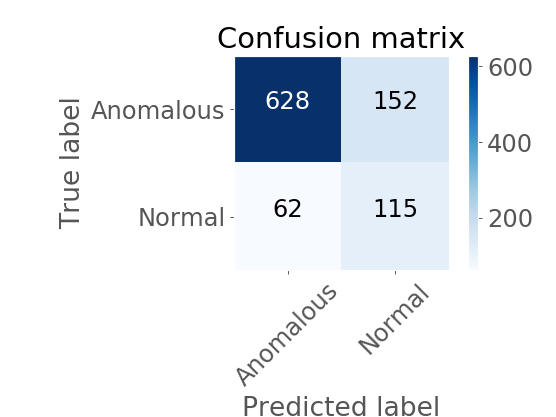

Confusion matrix, without normalization
[[628 152]
 [ 62 115]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       780
           1       0.43      0.65      0.52       177

    accuracy                           0.78       957
   macro avg       0.67      0.73      0.69       957
weighted avg       0.82      0.78      0.79       957



In [21]:
testing_dataset = representative_datasets[best_no_of_features-min(representative_datasets.keys())]

model = model_evaluation(balanced_datasets, testing_dataset = testing_dataset, classifier = sklearn.neighbors.KNeighborsClassifier,
                                no_of_features = best_no_of_features, best_params = best_params,
                                scorer = metrics.accuracy_score, seed = 0, verbose = 0)

# <a id='use'>Use Model</a>
## <a id='save'>Store Model</a>

In [22]:
save_model(model, best_no_of_features)

Model Desc:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Please enter a name for your model
Note: the no.of.features will be appended)
>>>New_KNeighbour_Classifier
Successfully saved model to New_KNeighbour_Classifier_6.joblib


## <a id='load'>Load Model</a>

In [35]:
model = load_model()

0: New_KNeighbour_Classifier_6.joblib
1: basic_model_7_neighbours_3.joblib
2: energy_trained_6.joblib
3: functional_model_4.joblib
4: Random-Forest_Entropy_130Estimators_10.joblib
5: RandomForest_Gini_130Estimators_10.joblib
6: Representative_Regression_11.joblib
7: SVM_1.79C_ScaleGamma_4.joblib
8: Support_Vector_Machine_4.joblib
9: logistic_regress-newton-cg_9.joblib
Type the number associated with the model you would like to load0
>>>Model Loaded<<<
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
